In [ ]:
# Importing
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from keras.layers import *
import matplotlib.pyplot as plt
import os
import nibabel as nib
import pandas as pd
import scipy
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import random
from sklearn.model_selection import train_test_split

In [ ]:
#reading in the demented dataset
scans = [
    os.path.join('C:\\Users\\Ch1ck\\Desktop\\Dataset\\Moderate_Demented', x)
    for x in os.listdir('C:\\Users\\Ch1ck\\Desktop\\Dataset\\Moderate_Demented')]

# Reading images and turning them into numpy arrays
demented_x = []
for imgs in scans:
    image = Image.open(imgs)
    image = np.array(image)
    demented_x.append(image)
    

# two passes since we are concatenating mild and moderate
scans = [
    os.path.join('C:\\Users\\Ch1ck\\Desktop\\Dataset\\Mild_Demented', x)
    for x in os.listdir('C:\\Users\\Ch1ck\\Desktop\\Dataset\\Mild_Demented')
]

# Reading images and turning them into numpy arrays
for imgs in scans:
    image = Image.open(imgs)
    image = np.array(image)
    demented_x.append(image)

# Creating labels
demented_x = np.array(demented_x)
shape = demented_x.shape
demented_x = demented_x.reshape(shape[0], shape[1], shape[2], 1)
print(demented_x.shape)
demented_y = np.ones((demented_x.shape[0],1))

(960, 128, 128, 1)


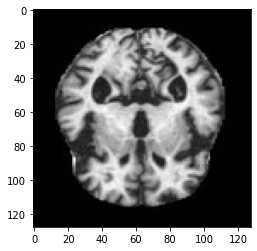

In [ ]:
plt.imshow(demented_x[6], cmap = 'gray')

In [ ]:
#reading in the normal scans
scans = [
    os.path.join('C:\\Users\\Ch1ck\\Desktop\\Dataset\\Non_Demented', x)
    for x in os.listdir('C:\\Users\\Ch1ck\\Desktop\\Dataset\\Non_Demented')
]

normal_x = []

# Reading images and turning them into numpy arrays
for imgs in scans:
    image = Image.open(imgs)
    image = np.array(image)
    normal_x.append(image)

# Creating labels
normal_x = np.array(normal_x)
shape = normal_x.shape
normal_x = normal_x.reshape(shape[0], shape[1], shape[2], 1)
print(normal_x.shape)
normal_y = np.zeros((normal_x.shape[0],1))

(3200, 128, 128, 1)


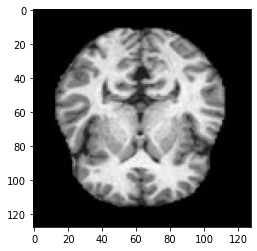

In [ ]:
plt.imshow(normal_x[6], cmap = 'gray')

In [ ]:
print(normal_x.shape)
print(normal_y.shape)
print(demented_x.shape)
print(demented_y.shape)
print(normal_y[0])
print(demented_y[0])

(3200, 128, 128, 1)
(3200, 1)
(960, 128, 128, 1)
(960, 1)
[0.]
[1.]


In [ ]:
# Concatenating datasets
x_train = np.concatenate((normal_x, demented_x), axis=0)
y_train = np.concatenate((normal_y, demented_y), axis=0)

In [ ]:
# Shuffling data while maintaining corellations to x and y sets
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

# Applying shuffling
x_train, y_train = unison_shuffled_copies(x_train, y_train)

'\ntemp = list(zip(x_train, y_train))\nrandom.shuffle(temp)\nres1, res2 = zip(*temp)\n# res1 and res2 come out as tuples, and so must be converted to lists.\nres1, res2 = list(res1), list(res2)\n'

In [ ]:
print(x_train.shape)
print(y_train.shape)

(4160, 128, 128, 1)
(4160, 1)


In [ ]:
# Train/Test splits
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = .2)

# The Model
We developed a fairly simplistic model that only used 3 convolutional layers, max pooling layers, a single fully connected layer, and an output layer.

In [ ]:
# Creating model
def get_model():
    
    inputs = keras.Input((128, 128, 1))
    
    x = layers.Conv2D(64, 3, activation='relu')(inputs)
    x = layers.MaxPool2D(2)(x)
    
    x = layers.Conv2D(128, 3, activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    
    x = layers.Conv2D(256, 3, activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs, outputs)
    return model

model = get_model()
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       295168

In [ ]:
# Compiling model with binary crossentropy, adam at 1e-4 learning rate, and metrics
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["acc"])

# Training model on 50 batch size, 25 epochs, early stopping, and checkpoints
history = model.fit(
    x_train, 
    y_train,
    validation_split=.2,
    batch_size=50,
    epochs=25,
    shuffle=True,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_acc', patience=15),
              keras.callbacks.ModelCheckpoint('classification_file.h5', save_best_only=True)]
)

Epoch 1/25
54/54 [==============================] - 30s 556ms/step - loss: 3.5452 - acc: 0.6972 - val_loss: 0.4143 - val_acc: 0.8033
Epoch 2/25
54/54 [==============================] - 30s 558ms/step - loss: 0.4020 - acc: 0.8077 - val_loss: 0.5575 - val_acc: 0.7297
Epoch 3/25
54/54 [==============================] - 31s 581ms/step - loss: 0.2865 - acc: 0.8742 - val_loss: 0.2530 - val_acc: 0.8949
Epoch 4/25
54/54 [==============================] - 32s 589ms/step - loss: 0.2082 - acc: 0.9215 - val_loss: 0.1991 - val_acc: 0.9249
Epoch 5/25
54/54 [==============================] - 32s 587ms/step - loss: 0.1362 - acc: 0.9628 - val_loss: 0.1463 - val_acc: 0.9580
Epoch 6/25
54/54 [==============================] - 32s 587ms/step - loss: 0.0987 - acc: 0.9756 - val_loss: 0.1155 - val_acc: 0.9730
Epoch 7/25
54/54 [==============================] - 32s 589ms/step - loss: 0.0786 - acc: 0.9827 - val_loss: 0.1070 - val_acc: 0.9640
Epoch 8/25
54/54 [==============================] - 34s 624ms/step - 

In [ ]:
# Checking model performance
model.evaluate(x_test,y_test)

# Saving model
model.save('C:\\Users\\Ch1ck\\Desktop\\Dataset\\model2')

26/26 [==============================] - 2s 84ms/step - loss: 0.0461 - acc: 0.9916
INFO:tensorflow:Assets written to: C:\Users\Ch1ck\Desktop\Dataset\model2\assets


In [ ]:
print(history.params)

{'verbose': 1, 'epochs': 25, 'steps': 54}


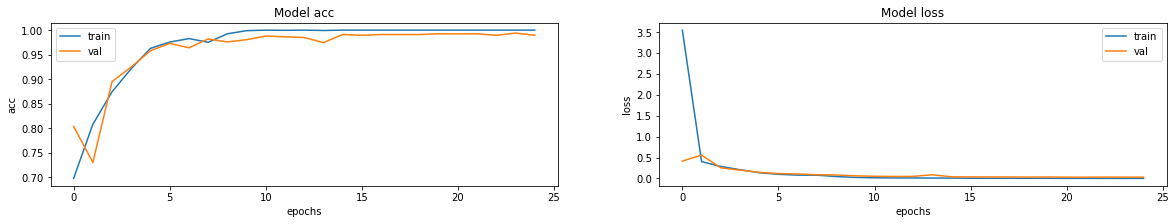

In [ ]:
# Displaying results of training
hist = history.history
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(hist[metric])
    ax[i].plot(hist["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])